In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold

In [27]:
df=pd.read_csv('Food_Delivery_Time_Prediction.csv')

In [28]:
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [29]:
df.columns

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount'],
      dtype='object')

In [30]:
df.isnull().sum()

Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64

In [31]:
df.describe()

,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,11.498050,5.250000,3.738500,3.686500,70.494950,1046.488700,46.616650
std,6.841755,2.745027,0.703021,0.697063,29.830694,548.568922,29.361706
min,0.520000,1.000000,2.500000,2.600000,15.230000,122.300000,1.240000
25%,6.090000,3.000000,3.200000,3.100000,46.997500,553.270000,21.602500
50%,10.265000,5.000000,3.800000,3.700000,72.775000,1035.950000,47.530000
75%,16.497500,8.000000,4.300000,4.300000,96.650000,1543.125000,70.245000
max,24.900000,10.000000,5.000000,5.000000,119.670000,1997.420000,99.740000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Customer_Location           200 non-null    object 
 2   Restaurant_Location         200 non-null    object 
 3   Distance                    200 non-null    float64
 4   Weather_Conditions          200 non-null    object 
 5   Traffic_Conditions          200 non-null    object 
 6   Delivery_Person_Experience  200 non-null    int64  
 7   Order_Priority              200 non-null    object 
 8   Order_Time                  200 non-null    object 
 9   Vehicle_Type                200 non-null    object 
 10  Restaurant_Rating           200 non-null    float64
 11  Customer_Rating             200 non-null    float64
 12  Delivery_Time               200 non-null    float64
 13  Order_Cost                  200 non

In [33]:
df.shape

(200, 15)

In [34]:
df = pd.get_dummies( df, columns=['Weather_Conditions', 'Traffic_Conditions','Order_Priority','Vehicle_Type', 'Order_Time'],
            drop_first=True)

In [35]:
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,...,Weather_Conditions_Sunny,Traffic_Conditions_Low,Traffic_Conditions_Medium,Order_Priority_Low,Order_Priority_Medium,Vehicle_Type_Bike,Vehicle_Type_Car,Order_Time_Evening,Order_Time_Morning,Order_Time_Night
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,4,4.1,3.0,26.22,1321.10,81.54,...,False,False,True,False,True,False,True,False,False,False
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,8,4.5,4.2,62.61,152.21,29.02,...,False,False,True,True,False,False,True,False,False,True
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,9,3.3,3.4,48.43,1644.38,64.17,...,False,False,True,False,False,True,False,False,False,True
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,2,3.2,3.7,111.63,541.25,79.23,...,False,True,False,False,True,True,False,True,False,False
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,6,3.5,2.8,32.38,619.81,2.34,...,False,False,False,True,False,True,False,False,False,True


In [36]:
scaler = StandardScaler()
num_cols = [ 'Distance', 'Delivery_Person_Experience', 'Restaurant_Rating', 'Customer_Rating', 'Order_Cost','Tip_Amount']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [37]:
df[num_cols]

,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Order_Cost,Tip_Amount
0,-1.454738,-0.456512,0.515500,-0.987317,0.501852,1.192403
1,1.439192,1.004325,1.085900,0.738511,-1.634294,-0.600810
2,-0.666417,1.369535,-0.625302,-0.412041,1.092646,0.599332
3,0.335835,-1.186930,-0.767902,0.019416,-0.923323,1.113532
4,-0.700119,0.273907,-0.340101,-1.274955,-0.779755,-1.511757
...,...,...,...,...,...,...
195,1.805512,1.004325,1.371100,0.450873,0.704997,0.673423
196,-0.792431,1.004325,-1.053102,-0.124403,1.231298,-0.216696
197,1.335157,-0.456512,-1.195702,-0.412041,0.566692,-1.417521
198,1.840679,1.369535,0.230299,1.601424,-1.264810,1.319075


In [38]:
df[num_cols].head()

,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Order_Cost,Tip_Amount
0,-1.454738,-0.456512,0.515500,-0.987317,0.501852,1.192403
1,1.439192,1.004325,1.085900,0.738511,-1.634294,-0.600810
2,-0.666417,1.369535,-0.625302,-0.412041,1.092646,0.599332
3,0.335835,-1.186930,-0.767902,0.019416,-0.923323,1.113532
4,-0.700119,0.273907,-0.340101,-1.274955,-0.779755,-1.511757


In [39]:
df['Rush_Hour'] = df['Order_Time_Evening'] | df['Order_Time_Night']
df['Rush_Hour'] = df['Rush_Hour'].astype(int)

In [40]:
df['Rush_Hour'].head()

0    0
1    1
2    1
3    1
4    1
Name: Rush_Hour, dtype: int64

CNN

In [41]:
X = df.drop(['Delivery_Time', 'Rush_Hour','Order_ID','Customer_Location','Restaurant_Location'], axis=1)
y = df['Rush_Hour']

In [42]:
num_features = X.shape[1]
side = int(np.ceil(np.sqrt(num_features)))

X_padded = np.zeros((X.shape[0], side * side))
X_padded[:, :num_features] = X

X_cnn = X_padded.reshape(-1, side, side, 1)

In [43]:
X_cnn

array([[[[-1.4547383 ],
         [-0.45651156],
         [ 0.51549954],
         [-0.98731739],
         [ 0.50185201]],

        [[ 1.19240301],
         [ 1.        ],
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        [[ 1.        ],
         [ 0.        ],
         [ 1.        ],
         [ 0.        ],
         [ 1.        ]],

        [[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        [[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]]],


       [[[ 1.43919167],
         [ 1.00432542],
         [ 1.08590013],
         [ 0.73851053],
         [-1.63429385]],

        [[-0.60081001],
         [ 0.        ],
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        [[ 1.        ],
         [ 1.        ],
         [ 0.        ],
         [ 0.        ],
         [ 1.        ]],

        [[ 0.        ]

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

In [45]:
def create_cnn():
    model = Sequential([
        Input(shape=(side, side, 1)),   

        Conv2D(32, (3,3), activation='relu', padding='same'),
        MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation='relu', padding='same'),

        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


In [46]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
acc_scores = []
fold = 1

for train_idx, val_idx in kf.split(X_cnn):
    print(f" Fold {fold}")

    X_train, X_val = X_cnn[train_idx], X_cnn[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = create_cnn()
    model.fit(X_train, y_train, epochs=15, batch_size=32, verbose=0)

    y_pred = (model.predict(X_val) > 0.5).astype(int)

    acc = accuracy_score(y_val, y_pred)
    acc_scores.append(acc)

    print("Accuracy:", acc)
    print(confusion_matrix(y_val, y_pred))

    fold += 1

print("CNN Average Accuracy:", np.mean(acc_scores))


 Fold 1
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Accuracy: 0.9
[[19  3]
 [ 1 17]]
 Fold 2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Accuracy: 0.925
[[19  3]
 [ 0 18]]
 Fold 3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Accuracy: 0.95
[[16  1]
 [ 1 22]]
 Fold 4
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Accuracy: 0.95
[[17  1]
 [ 1 21]]
 Fold 5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Accuracy: 0.925
[[18  1]
 [ 2 19]]
CNN Average Accuracy: 0.93


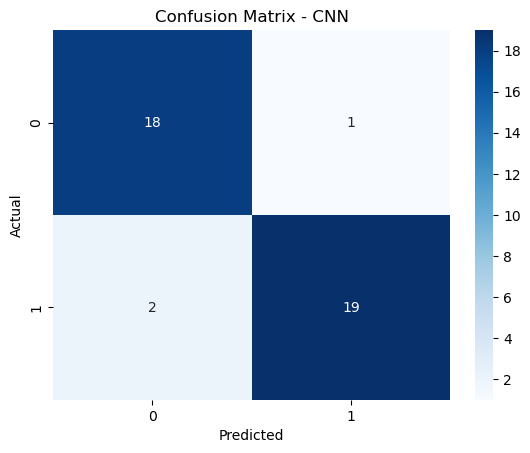

In [47]:
cm = confusion_matrix(y_val, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CNN')
plt.show()

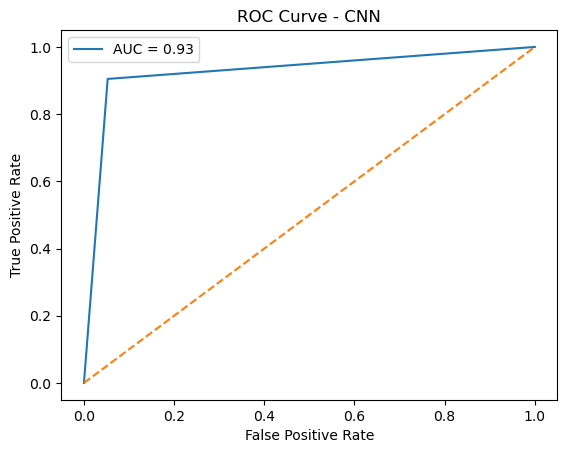

In [49]:
fpr, tpr, _ = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CNN')
plt.legend()
plt.show()

In [50]:
X = df.drop(['Delivery_Time', 'Rush_Hour','Order_ID','Customer_Location','Restaurant_Location'], axis=1)
y = df['Rush_Hour']

In [51]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [52]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [53]:
accuracy_score(y_test, y_pred)

0.45

In [54]:
y_pred = lr.predict(X_test)
cm1=confusion_matrix(y_test, y_pred)
cm1

array([[22,  0],
       [ 0, 18]])

In [68]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        22\n           1       1.00      1.00      1.00        18\n\n    accuracy                           1.00        40\n   macro avg       1.00      1.00      1.00        40\nweighted avg       1.00      1.00      1.00        40\n'

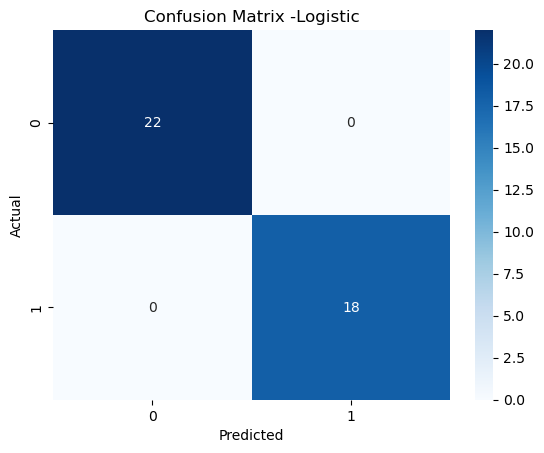

In [70]:
cm1 = confusion_matrix(y_test, y_pred)

sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix -Logistic')
plt.show()

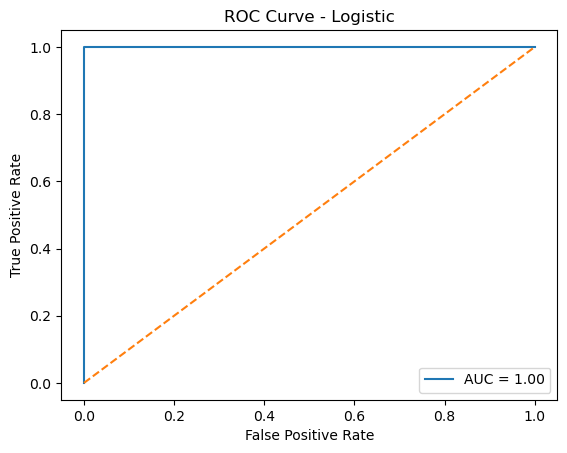

In [71]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic')
plt.legend()
plt.show()

In [72]:
#REPORT

First loaded the dataset and check for null values the dataset doesn't have any null values then find out the shape of 
dataset which is 200,15 then using describe function find out the mean,min,max,standard deviation ,count ,quartile, etc
using info function check the datatype of the columns then applied the label encoder on the columns 'Weather_Conditions',
'Traffic_Conditions','Order_Priority','Vehicle_Type', 'Order_Time' created dummy varaibles and then scaled the features 
using StandardScaler 'Distance', 'Delivery_Person_Experience', 'Restaurant_Rating', 'Customer_Rating', 'Order_Cost','Tip_Amount'
this columns are scaled then created the rush hour column for classification and encode them 0,1 on the basis of delivery time taken 
then convert the data for CNN model and an then applied the K-Fold for 5 times and got the average accuracy of 92.5%  and Logistic
Regression give the accuracy of 100% the Logistic regression gives more accuracy because the it is better model then cnn because 
it learns data pattern directly so in this case Logistic Regression performs well also drawn the confusion matrix and roc curve
for the both model.

This project shows how a CNN can be used to predict food delivery time using tabular data even cnn are usually
used for images, we applied them here by reshaping the data K-Fold Cross-Validation helped check that the model works
well and is reliable.